# Extract the data

In [1]:
# import necessary libraries
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\Geetha\Downloads\Amazon Sales data.csv")


In [3]:
df=data.copy()

In [4]:
df

Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Priority  Order Date   Order ID   Ship Date  \
0        Offline              H   5/28/2010  669165933   6/27/2010   
1         Online              C   8/22/2012  963881480   9/15/2012   
2        Offline              L    5/2/2014  341417157    5/8/2014   
3         Online              C   6/20/2014  514321792    7/5/2014   
4        Offline              L    2/1/2013  115456712    2/6/2013   
..           ...            ...         ...        ...         ...   
95        Online              M   7/26/2011  512878119    9/3/2011   
96       Offline              L  11/11/2011  810711038  12/28/2011   
97       Offline              C    6/1/2016  728815257   6/29/2016   
98       Offline              M   7/30/2015  559427106    8/8/2015   
99       Offline              L   2/10/2012  665095412   2/15/2012   

    Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0         9925      255.28     159.42     2533654.00  1582243.50     951410.50  
1         2804      205.70     117.11      576782.80   328376.44     248406.36  
2         1779      651.21     524.96     1158502.59   933903.84     224598.75  
3         8102        9.33       6.92       75591.66    56065.84      19525.82  
4         5062      651.21     524.96     3296425.02  2657347.52     639077.50  
..         ...         ...        ...            ...         ...           ...  
95         888      109.28      35.84       97040.64    31825.92      65214.72  
96        6267        9.33       6.92       58471.11    43367.64      15103.47  
97        1485      154.06      90.93      228779.10   135031.05      93748.05  
98        5767       81.73      56.67      471336.91   326815.89     144521.02  
99        5367      668.27     502.54     3586605.09  2697132.18     889472.91  

[100 rows x 14 columns]

# Data cleaning

In [5]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
# Changing data types
df["Unit Price"]=df['Unit Price'].astype('int')
df["Total Cost"]=df['Total Cost'].astype('int')
df["Unit Cost"]=df['Unit Cost'].astype('int')
df["Total Revenue"]=df['Total Revenue'].astype('int')
df["Total Profit"]=df['Total Profit'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region          100 non-null    object
 1   Country         100 non-null    object
 2   Item Type       100 non-null    object
 3   Sales Channel   100 non-null    object
 4   Order Priority  100 non-null    object
 5   Order Date      100 non-null    object
 6   Order ID        100 non-null    int64 
 7   Ship Date       100 non-null    object
 8   Units Sold      100 non-null    int64 
 9   Unit Price      100 non-null    int32 
 10  Unit Cost       100 non-null    int32 
 11  Total Revenue   100 non-null    int32 
 12  Total Cost      100 non-null    int32 
 13  Total Profit    100 non-null    int32 
dtypes: int32(5), int64(2), object(7)
memory usage: 9.1+ KB


In [9]:
# Display total no.of rows and columns 
df.shape

(100, 14)

In [10]:
# Display total no.of missing values 
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

#### Since the data is cleaned and found there are no missing values further we can proceed with outliers detection.

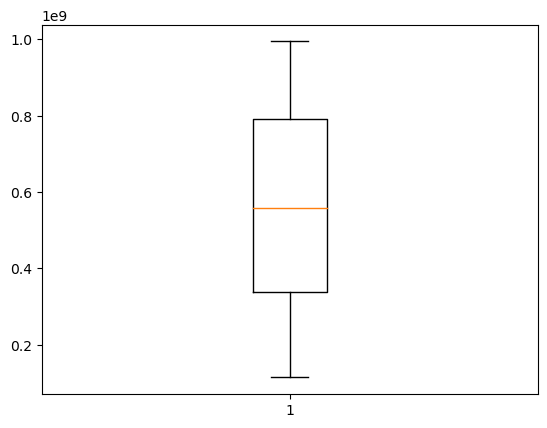

In [11]:
plt.boxplot(df["Order ID"])
plt.show()

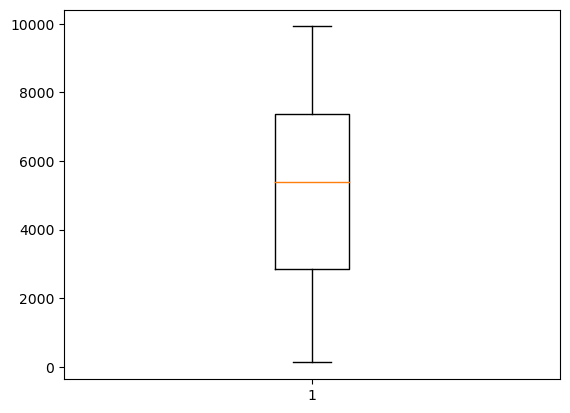

In [12]:
plt.boxplot(df["Units Sold"])
plt.show()

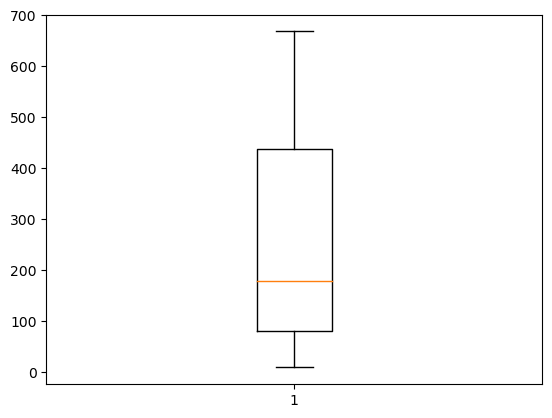

In [13]:
plt.boxplot(df["Unit Price"])
plt.show()

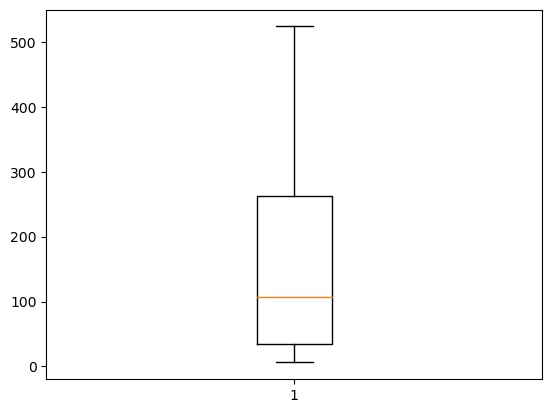

In [14]:
plt.boxplot(df["Unit Cost"])
plt.show()

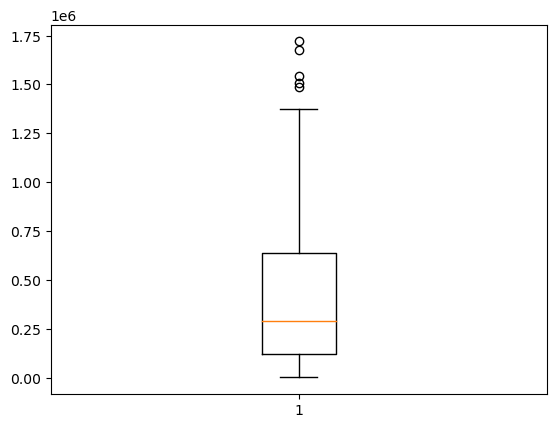

In [15]:
plt.boxplot(df["Total Profit"])
plt.show()

In [16]:
q1=df["Total Profit"].quantile(0.25)
q3=df["Total Profit"].quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [17]:
df["Total Profit"]=df["Total Profit"].map(lambda x:lower if x<lower else upper if x>upper else x)

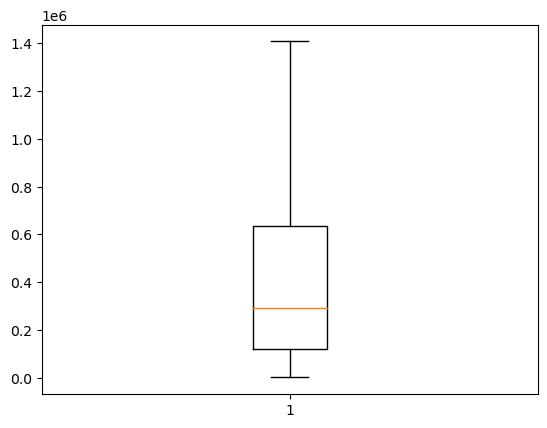

In [18]:
plt.boxplot(df["Total Profit"])
plt.show()

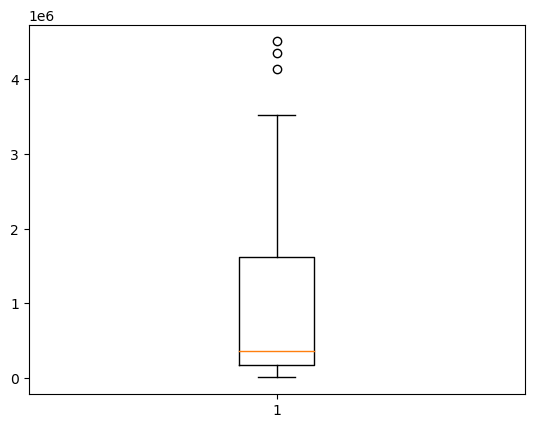

In [19]:
plt.boxplot(df["Total Cost"])
plt.show()

In [20]:
q1=df["Total Cost"].quantile(0.25)
q3=df["Total Cost"].quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [21]:
df["Total Cost"]=df["Total Cost"].map(lambda x:lower if x<lower else upper if x>upper else x)

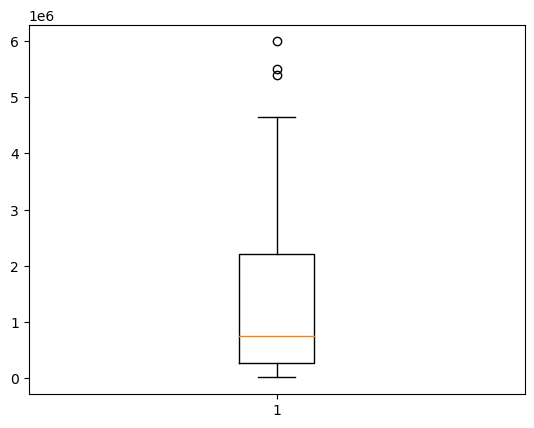

In [22]:
plt.boxplot(df["Total Revenue"])
plt.show()

In [23]:
q1=df["Total Revenue"].quantile(0.25)
q3=df["Total Revenue"].quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [24]:
df["Total Revenue"]=df["Total Revenue"].map(lambda x:lower if x<lower else upper if x>upper else x)

# Analysis - Calculate sales trends

In [25]:
df

Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Priority  Order Date   Order ID   Ship Date  \
0        Offline              H   5/28/2010  669165933   6/27/2010   
1         Online              C   8/22/2012  963881480   9/15/2012   
2        Offline              L    5/2/2014  341417157    5/8/2014   
3         Online              C   6/20/2014  514321792    7/5/2014   
4        Offline              L    2/1/2013  115456712    2/6/2013   
..           ...            ...         ...        ...         ...   
95        Online              M   7/26/2011  512878119    9/3/2011   
96       Offline              L  11/11/2011  810711038  12/28/2011   
97       Offline              C    6/1/2016  728815257   6/29/2016   
98       Offline              M   7/30/2015  559427106    8/8/2015   
99       Offline              L   2/10/2012  665095412   2/15/2012   

    Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0         9925         255        159      2533654.0   1582243.0      951410.0  
1         2804         205        117       576782.0    328376.0      248406.0  
2         1779         651        524      1158502.0    933903.0      224598.0  
3         8102           9          6        75591.0     56065.0       19525.0  
4         5062         651        524      3296425.0   2657347.0      639077.0  
..         ...         ...        ...            ...         ...           ...  
95         888         109         35        97040.0     31825.0       65214.0  
96        6267           9          6        58471.0     43367.0       15103.0  
97        1485         154         90       228779.0    135031.0       93748.0  
98        5767          81         56       471336.0    326815.0      144521.0  
99        5367         668        502      3586605.0   2697132.0      889472.0  

[100 rows x 14 columns]

In [26]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [27]:
# Extract month and year
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [28]:
# Month-wise sales
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

In [29]:
# Year-wise sales
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

In [30]:
# Yearly_month-wise sales
yearly_monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum()

In [31]:
# Display the Month-wise Sales:
print("Month-wise Sales:")
print(monthly_sales)


Month-wise Sales:
Month
1     10096265.25
2     23870486.25
3      2274822.00
4     16187183.00
5     13215736.00
6      5230321.00
7     15669512.00
8      1128163.00
9      5314760.00
10    15018024.25
11    20568218.00
12     7249461.00
Name: Total Revenue, dtype: float64


In [32]:
# Display the Year-wise Sales:
print("\nYear-wise Sales:")
print(yearly_sales)


Year-wise Sales:
Year
2010    18916473.25
2011    11129160.00
2012    31898633.00
2013    20330445.00
2014    16630208.00
2015    12041779.25
2016    12372864.00
2017    12503389.25
Name: Total Revenue, dtype: float64


In [33]:
# Display the Yearly-month-wise Sales:
print("\nYearly-Month-wise Sales:")
print(yearly_monthly_sales)


Yearly-Month-wise Sales:
Year  Month
2010  2        3410660.00
      5        2587973.00
      6        1082418.00
      10       5795384.25
      11       3458252.00
      12       2581786.00
2011  1        1042225.00
      2         387002.00
      4        2798046.00
      5         272410.00
      6          19103.00
      7          97040.00
      9         574951.00
      11       5938383.00
2012  1        1012883.00
      2        6707849.00
      3         994765.00
      4        4556011.00
      5        3782780.00
      6        2132073.00
      7        4445092.00
      8         576782.00
      9        4648152.00
      10       3042246.00
2013  2        3296425.00
      3         835759.00
      4        3262562.00
      6        1352867.00
      7        8545510.00
      8          89623.00
      9          71253.00
      10       2702770.00
      12        173676.00
2014  2        1819659.00
      4        4510578.00
      5        3060338.00
      6          75591.00


In [34]:
df

Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Priority Order Date   Order ID   Ship Date  Units Sold  \
0        Offline              H 2010-05-28  669165933   6/27/2010        9925   
1         Online              C 2012-08-22  963881480   9/15/2012        2804   
2        Offline              L 2014-05-02  341417157    5/8/2014        1779   
3         Online              C 2014-06-20  514321792    7/5/2014        8102   
4        Offline              L 2013-02-01  115456712    2/6/2013        5062   
..           ...            ...        ...        ...         ...         ...   
95        Online              M 2011-07-26  512878119    9/3/2011         888   
96       Offline              L 2011-11-11  810711038  12/28/2011        6267   
97       Offline              C 2016-06-01  728815257   6/29/2016        1485   
98       Offline              M 2015-07-30  559427106    8/8/2015        5767   
99       Offline              L 2012-02-10  665095412   2/15/2012        5367   

    Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  Month  \
0          255        159      2533654.0   1582243.0      951410.0      5   
1          205        117       576782.0    328376.0      248406.0      8   
2          651        524      1158502.0    933903.0      224598.0      5   
3            9          6        75591.0     56065.0       19525.0      6   
4          651        524      3296425.0   2657347.0      639077.0      2   
..         ...        ...            ...         ...           ...    ...   
95         109         35        97040.0     31825.0       65214.0      7   
96           9          6        58471.0     43367.0       15103.0     11   
97         154         90       228779.0    135031.0       93748.0      6   
98          81         56       471336.0    326815.0      144521.0      7   
99         668        502      3586605.0   2697132.0      889472.0      2   

    Year  
0   2010  
1   2012  
2   2014  
3   2014  
4   2013  
..   ...  
95  2011  
96  2011  
97  2016  
98  2015  
99  2012  

[100 rows x 16 columns]

# Data Visualization

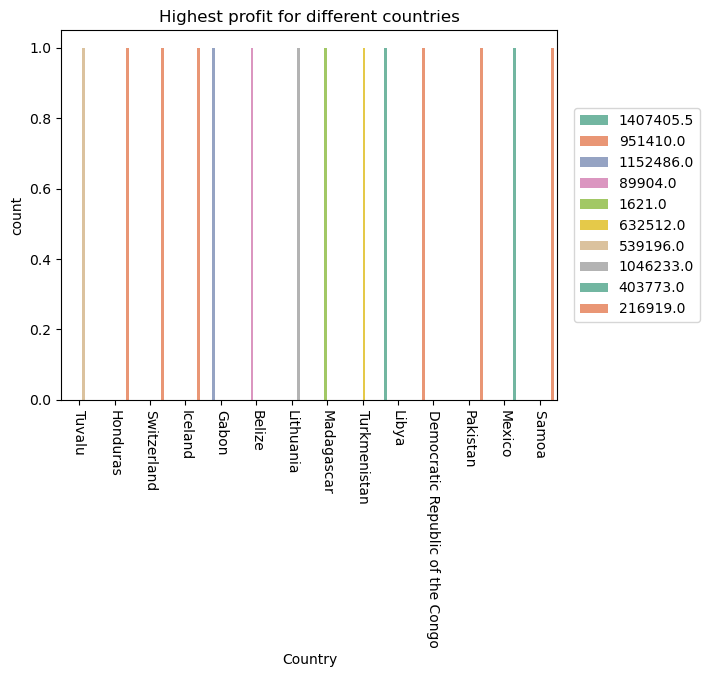

In [36]:
# Visualization for highest profits Distribution
top_profit = df['Total Profit'].value_counts().nlargest(10).index
filtered_data = df[df['Total Profit'].isin(top_profit)]
sns.countplot(x='Country', hue='Total Profit', data=filtered_data, palette='Set2')
plt.legend(top_profit, loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.title( 'Highest profit for different countries')
plt.xticks(rotation=-90)
plt.show()

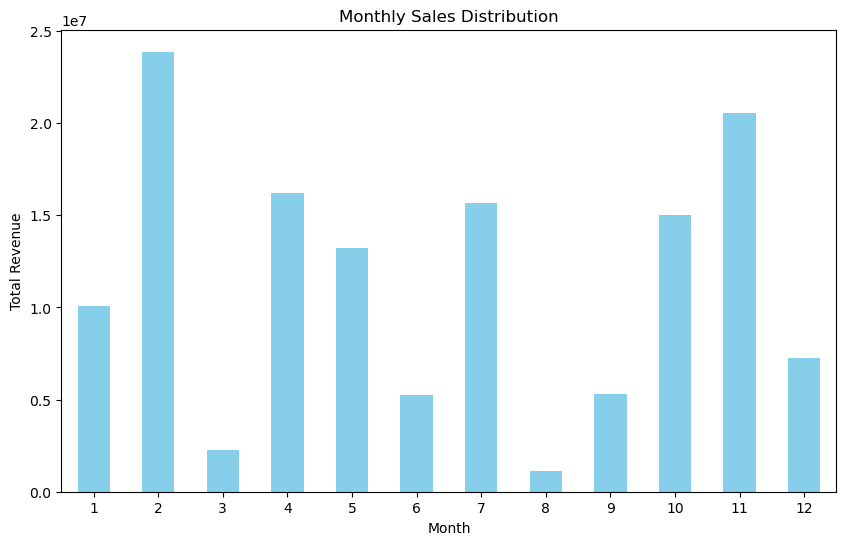

In [37]:
# Visualization for Monthly Sales Distribution
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

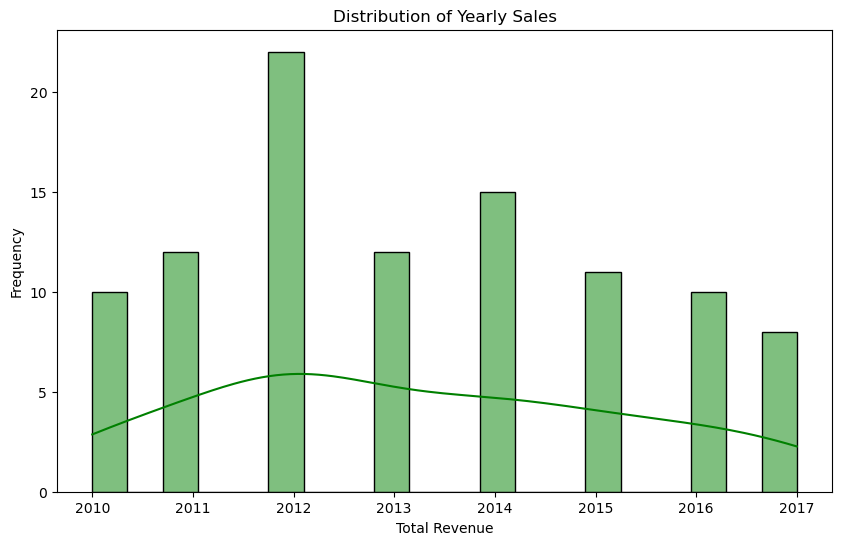

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde=True, color='green', bins=20)
plt.title('Distribution of Yearly Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

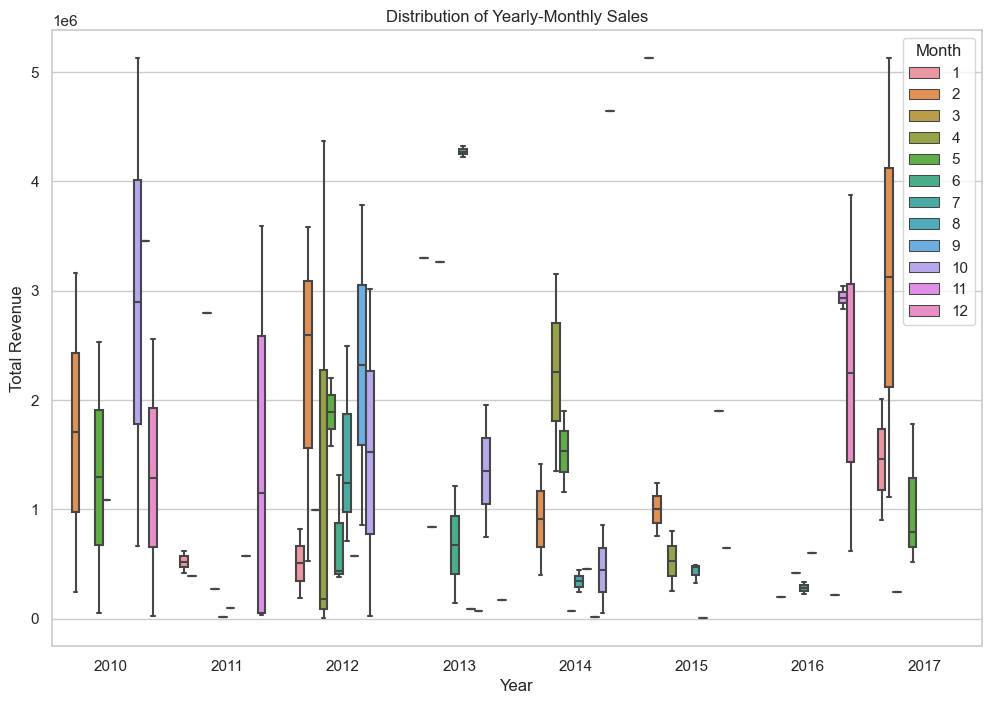

In [39]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(x='Year', y='Total Revenue', hue='Month', data=df)
plt.title('Distribution of Yearly-Monthly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

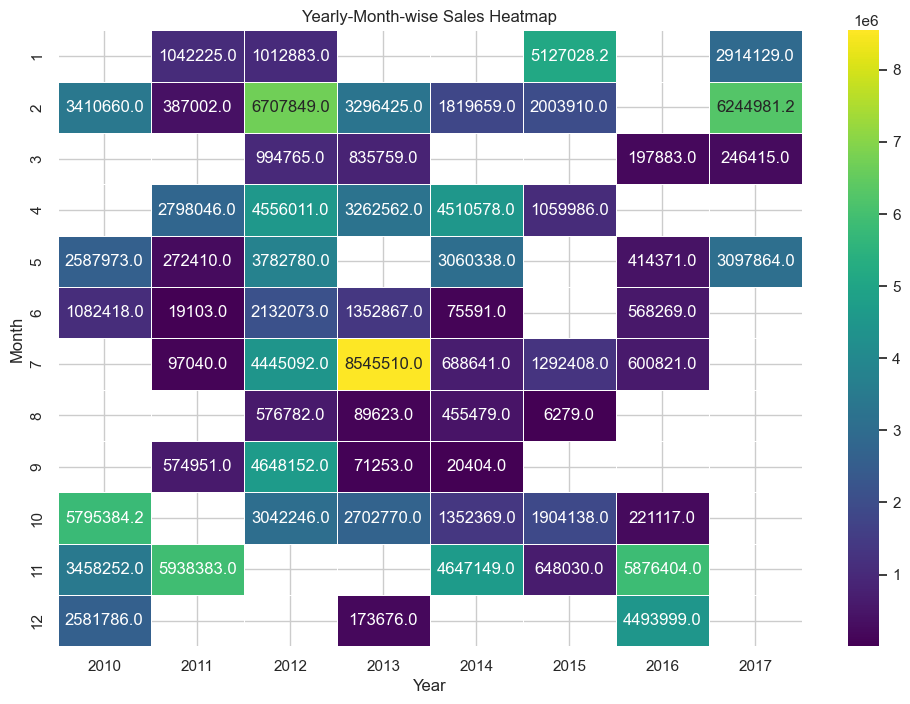

In [40]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(values='Total Revenue', index='Month', columns='Year', aggfunc='sum')
# Visualization of Yearly-Month-wise Sales using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('Yearly-Month-wise Sales Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Scenario

In [41]:
df.nlargest(10,'Total Profit')

Region      Country  Item Type Sales Channel  \
13  Central America and the Caribbean     Honduras  Household       Offline   
30                             Europe  Switzerland  Cosmetics       Offline   
46                             Europe      Iceland  Cosmetics        Online   
74       Middle East and North Africa     Pakistan  Cosmetics       Offline   
79              Australia and Oceania       Samoa   Cosmetics        Online   
93                             Europe      Romania  Cosmetics        Online   
33                               Asia      Myanmar  Household       Offline   
41       Middle East and North Africa   Azerbaijan  Cosmetics        Online   
59                 Sub-Saharan Africa     Djibouti  Cosmetics       Offline   
16                               Asia    Sri Lanka  Cosmetics       Offline   

   Order Priority Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
13              H 2017-02-08  522840487   2/13/2017        8974         668   
30              M 2012-09-17  249693334  10/20/2012        8661         437   
46              C 2016-12-31  331438481  12/31/2016        8867         437   
74              L 2013-07-05  231145322   8/16/2013        9892         437   
79              H 2013-07-20  670854651    8/7/2013        9654         437   
93              H 2010-11-26  660643374  12/25/2010        7910         437   
33              H 2015-01-16  177713572    3/1/2015        8250         668   
41              M 2010-02-06  382392299   2/25/2010        7234         437   
59              H 2014-04-07  259353148   4/19/2014        7215         437   
16              M 2016-11-19  419123971  12/18/2016        6952         437   

    Unit Cost  Total Revenue  Total Cost  Total Profit  Month  Year  
13        502     5127028.25   3781371.5     1407405.5      2  2017  
30        263     3786589.00   2280701.0     1407405.5      9  2012  
46        263     3876652.00   2334947.0     1407405.5     12  2016  
74        263     4324782.00   2604860.0     1407405.5      7  2013  
79        263     4220728.00   2542187.0     1407405.5      7  2013  
93        263     3458252.00   2082940.0     1375311.0     11  2010  
33        502     5127028.25   3781371.5     1367272.0      1  2015  
41        263     3162704.00   1904929.0     1257775.0      2  2010  
59        263     3154398.00   1899925.0     1254472.0      4  2014  
16        263     3039414.00   1830670.0     1208744.0     11  2016